<a href="https://colab.research.google.com/github/oktsadwikar/DPDM2023/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Preparation**

In [2]:
import pandas as pd
import numpy as np

### Metadata

Number of Instances: 690

Number of Attributes: 15 + class attribute

Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)

Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

Class Distribution
  
    +: 307 (44.5%)
    -: 383 (55.5%)


- ✔️ (1) Set header = None and Set Columns names

In [3]:
col_name = ['a1','a2','a3','a4','a5','a6','a7','a8','a9','a10','a11','a12','a13','a14','a15','a16']

In [4]:
credit = pd.read_csv('/content/drive/MyDrive/DPDM23_DATA/crx.data', header = None, names=col_name) # (1) Set header = None because there is no column name in the data frame
credit.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


### Missing Value


in this case, we want to drop all the missing value

In [5]:
credit = credit[['a3','a8','a9','a10','a11','a12','a13','a15','a16']]

In [6]:
credit.isnull().any()

a3     False
a8     False
a9     False
a10    False
a11    False
a12    False
a13    False
a15    False
a16    False
dtype: bool

## Data Preprocessing

In [7]:
credit = credit.replace({'t':1,'f':0,'g':1,'p':2,'s':3,'+':1,'-':0})
credit

,a3,a8,a9,a10,a11,a12,a13,a15,a16
0,0.000,1.25,1,1,1,0,1,0,1
1,4.460,3.04,1,1,6,0,1,560,1
2,0.500,1.50,1,0,0,0,1,824,1
3,1.540,3.75,1,1,5,1,1,3,1
4,5.625,1.71,1,0,0,0,3,0,1
...,...,...,...,...,...,...,...,...,...
685,10.085,1.25,0,0,0,0,1,0,0
686,0.750,2.00,0,1,2,1,1,394,0
687,13.500,2.00,0,1,1,1,1,1,0
688,0.205,0.04,0,0,0,0,1,750,0


## Try simple ML

In [8]:
import numpy as np

In [9]:
np.random.seed(seed=1)

In [10]:
a = np.random.randint(2,size=len(credit))

In [11]:
a

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [12]:
train = credit[a == 1]
train.shape

(324, 9)

In [13]:
test = credit[a == 0]
test.shape

(366, 9)

### Start decision tree

#### Import

In [14]:
from sklearn.tree import DecisionTreeClassifier

#### Define

In [15]:
Dtree1 = DecisionTreeClassifier(random_state=0)

#### Train

In [19]:
X_train = train.iloc[:,:-1] # all data without last column

In [18]:
Y_train = train.iloc[:,-1]

In [20]:
Dtree1.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

In [21]:
from sklearn import tree

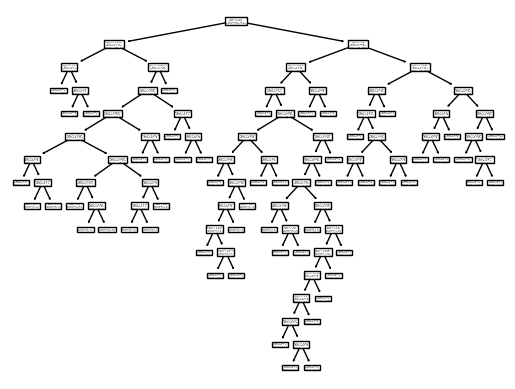

In [22]:
tree.plot_tree(Dtree1);

#### Test

In [23]:
X_test = test.iloc[:,:-1] # all data without last column

In [24]:
Y_test = test.iloc[:,-1]

In [25]:
y_predict = Dtree1.predict(X_test)

In [26]:
y_predict

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(Y_test, y_predict)

0.825136612021858

### Set Parameter

to simplify the tree

#### Import

In [29]:
from sklearn.tree import DecisionTreeClassifier

#### Define

change the max_depth to set the max of step

In [30]:
Dtree2 = DecisionTreeClassifier(random_state=0,max_depth = 4)

#### Train

In [31]:
Dtree2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [32]:
from sklearn import tree

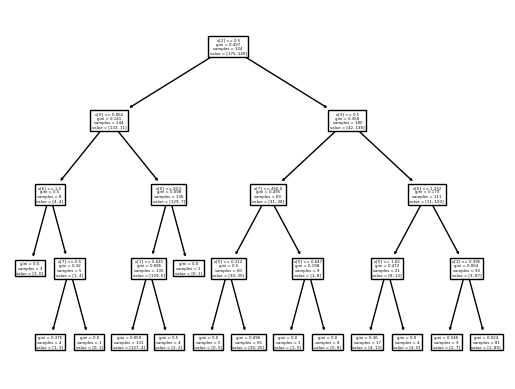

In [33]:
tree.plot_tree(Dtree2);

#### Test

In [34]:
y_predict2 = Dtree2.predict(X_test)

In [35]:
accuracy_score(Y_test, y_predict2)

0.8579234972677595

# **HOMEWORK 5**

Build decision tree model which has better accuracy than 0.86 and describe about parameters you set


Note : Get new tree with higher accuracy by trying other parameter, what you change like max_depth or max_leaf_node, or etc.

Deadline : Next Tuesday

### Define

In [36]:
Dtree3 = DecisionTreeClassifier(max_depth = 5, random_state = 0)

### Train

In [37]:
Dtree3.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [38]:
from sklearn import tree

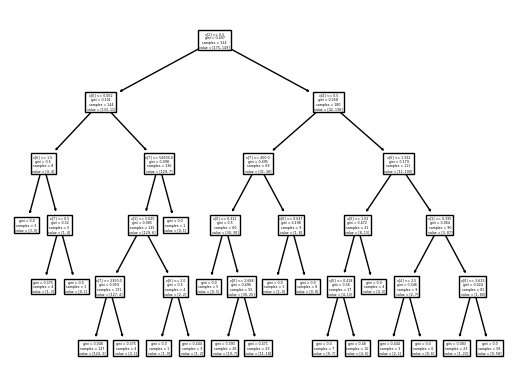

In [39]:
tree.plot_tree(Dtree3);

### Test

In [40]:
y_predict3 = Dtree3.predict(X_test)

In [41]:
accuracy_score(Y_test,y_predict3)

0.8688524590163934

## ANSWER

Set the max_depth = 5, then the accuaracy will increase. Now the accuracy is 0.8688 = 0.87.

When we set max_dept = 6, the accuracy will decrease (accuracy = 0.844).

Then, we use max_depth = 5 and try to set other parameter.

**set min_samples_split**

min_samples_split is the minimum number of samples required to split an internal node. try the min_samples_split with "trial and error" method, and get the min_sample_split is 50 to get better accuracy, which is 0.8825136612021858

### Define

In [42]:
Dtree4 = DecisionTreeClassifier(max_depth = 5, min_samples_split = 50, random_state = 0)

### Train

In [43]:
Dtree4.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=50, random_state=0)

In [44]:
from sklearn import tree

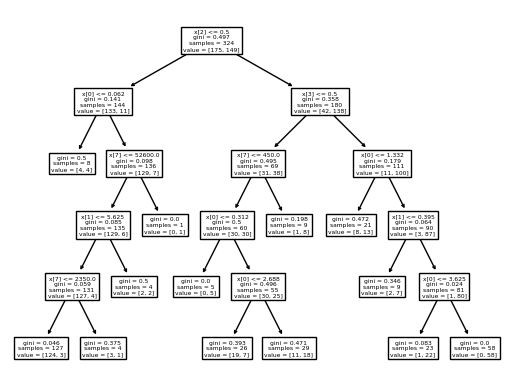

In [45]:
tree.plot_tree(Dtree4);

### Test

In [46]:
y_predict4 = Dtree4.predict(X_test)

In [47]:
accuracy_score(Y_test,y_predict4)

0.8825136612021858

# **Homework 6**

Build 5 Classification model as folllows:
- 3 Decision Tree model
- Naive Bayes Model
- 1 Other model

Using credit approval dataset (previous topic)

**Answer**

## Split Train Data

split Train Data into train and validation data

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
#split train -> train, Validation
X_traintrain, X_val, y_traintrain, y_val = train_test_split(X_train, Y_train, test_size=0.30, random_state=6)

## Classification Model

### Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
from sklearn import tree

#### Model 1

In [52]:
Model1 = DecisionTreeClassifier(max_depth = 5, min_samples_split = 50)

In [53]:
Model1.fit(X_traintrain,y_traintrain)

DecisionTreeClassifier(max_depth=5, min_samples_split=50)

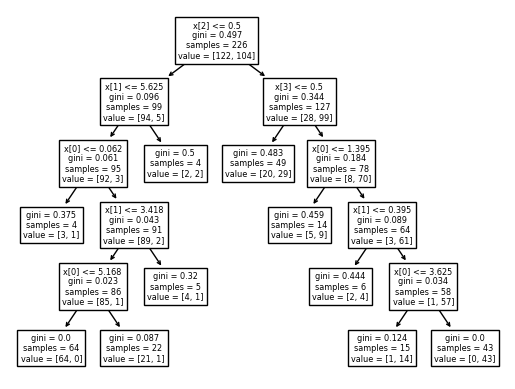

In [55]:
tree.plot_tree(Model1);

#### Model 2

In [56]:
Model2 = DecisionTreeClassifier(criterion = "log_loss", max_depth = 4)

In [57]:
Model2.fit(X_traintrain,y_traintrain)

DecisionTreeClassifier(criterion='log_loss', max_depth=4)

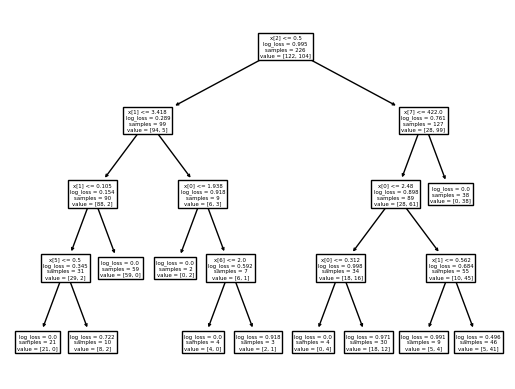

In [58]:
tree.plot_tree(Model2);

#### Model 3

In [59]:
Model3 = DecisionTreeClassifier(criterion = "entropy", random_state=0 ,max_depth = 9)

In [60]:
Model3.fit(X_traintrain,y_traintrain)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0)

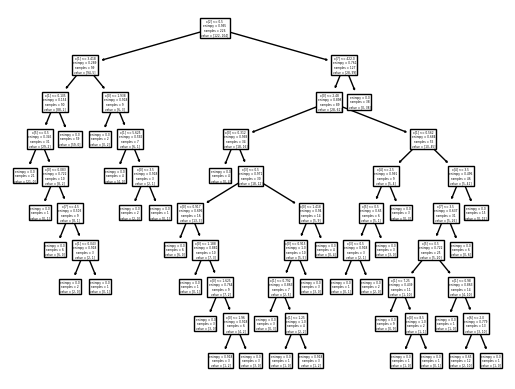

In [61]:
tree.plot_tree(Model3);

### Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB

#### Model 4

In [63]:
Model4 = GaussianNB()

In [64]:
Model4.fit(X_traintrain,y_traintrain)

GaussianNB()

### Support Vector Machines

Support Vector Machines (SVM) is a classifier that use kernel trick to handle nonlinear input spaces.

 A kernel transforms an input data space into the required form.

In [65]:
from sklearn import svm

#### Model 5

In [79]:
Model5 = svm.SVC(kernel = "linear")

In [80]:
Model5.fit(X_traintrain,y_traintrain)

SVC(kernel='linear')

## Validate Model

In [82]:
from sklearn.metrics import accuracy_score

### Model 1

In [83]:
y_pred1 =Model1.predict(X_val)
accuracy_score(y_val,y_pred1)

0.7959183673469388

### Model 2

In [84]:
y_pred2 = Model2.predict(X_val)
accuracy_score(y_val,y_pred2)

0.7653061224489796

### Model 3

In [85]:
y_pred3 = Model3.predict(X_val)
accuracy_score(y_val,y_pred3)

0.7857142857142857

### Model 4

In [86]:
y_pred4 = Model4.predict(X_val)
accuracy_score(y_val,y_pred4)

0.7959183673469388

### Model 5

In [87]:
y_pred5 = Model5.predict(X_val)
accuracy_score(y_val,y_pred5)

0.8061224489795918

From the validation proccess, SVM model has the highest accuracy score, then select SVM model and do the evaluation.

## Evaluation

### Retrain model with full training data

In [88]:
SVMFull = svm.SVC(kernel = "linear")
SVMFull.fit(X_train, Y_train)

SVC(kernel='linear')

### Evaluation

In [95]:
from sklearn.metrics import classification_report, confusion_matrix

#### Accuracy Score

In [90]:
y_predict = SVMFull.predict(X_test)
accuracy_score(Y_test,y_predict)

0.8524590163934426

#### Confusion Matrix

In [91]:
cm = confusion_matrix(Y_test,y_predict)
cm

array([[167,  41],
       [ 13, 145]])

#### Classification Report

In [103]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       208
           1       0.78      0.92      0.84       158

    accuracy                           0.85       366
   macro avg       0.85      0.86      0.85       366
weighted avg       0.86      0.85      0.85       366



Precision : Out of all the applicant that the model predicted would get approved, only 78% actually did.

Recall : Out of all the applicant that actually did get approved, the model predicted this outcome correctly for 92% of those players.

The value of F1 score is 84%, it shows that the model is quite good at predicting whether or not applicant will get approved.